# MNIST + PCA
- Feature 784개 ==> 주요 Feature로 압축

In [ ]:
import tensorflow as tf

In [3]:
from tensorflow.keras.datasets.mnist import load_data
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

### [1] 데이터 로딩

In [4]:
(x_train, y_train), (x_test, y_test) = load_data()

In [9]:
x_train.shape, x_test.shape

((60000, 784), (10000, 28, 28))

### [2] 데이터 전처리

In [6]:
# reshape
x_train = x_train.reshape(-1, 28*28)

In [12]:
# 스케일링
x_train = x_train/255.0

### [3] PCA(주성분 분석

### 방법 1

In [59]:
pca = PCA(n_components=0.95)
x_train_reduced = pca.fit_transform(x_train)

In [60]:
print('선택한 차원(픽셀) 수 :', pca.n_components_)

선택한 차원(픽셀) 수 : 154


### 방법 2

In [61]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
d=np.argmax(cumsum>=0.95)+1

print(f'주성분 갯수(차원): {d}')

주성분 갯수(차원): 154


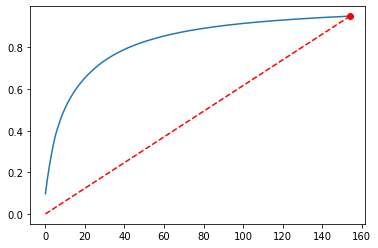

In [62]:
plt.plot(cumsum)
plt.plot([0,154.0], [0,0.95], 'r--')
plt.plot(d, 0.95, 'ro')
plt.show()

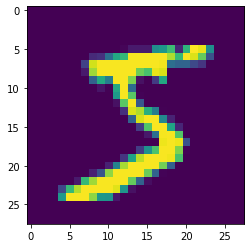

In [63]:
plt.imshow(x_train[0].reshape(28,28))
plt.show()

In [64]:
len(x_train_reduced[0])

154

#### 복원[3-3]

In [65]:
x_train_recovered = pca.inverse_transform(x_train_reduced)

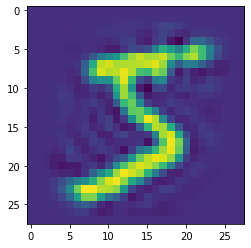

In [66]:
plt.imshow(x_train_recovered[0].reshape(28,28))
plt.show()

In [ ]:
# 압축된 피쳐성분기반 원래 성분 복원
reMnist = pca.inverse_transform(x_train_reduced)

In [132]:
def drawimage(selecimg, recoverimg):    
    plt.subplot(1,2,1)
    plt.imshow(selecimg.reshape(28,28), cmap='gray')
    plt.subplot(1,2,2)
    plt.imshow(recoverimg.reshape(28,28), cmap='gray')
    plt.show()    

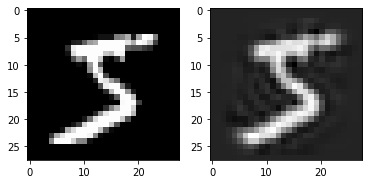

In [69]:
drawimage(x_train[0], x_train_recovered[0])

In [141]:
def drawimage1(selecimg, recoverimg):
    for i in range(1,7):
        plt.subplot(2,6,i*2-1)
        plt.imshow(selecimg[i-1].reshape(28,28), cmap='gray')
        plt.subplot(2,6,i*2)
        plt.imshow(recoverimg[i-1].reshape(28,28), cmap='gray')
        plt.show()    

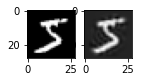

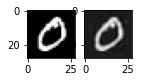

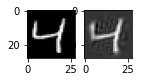

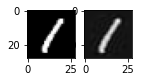

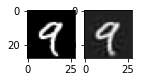

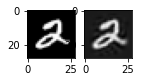

In [142]:
drawimage1(x_train, x_train_recovered)